<a href="https://colab.research.google.com/github/PkkingTom/portfolio/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Preview structure
print(df.shape)
print(df.columns)
print(df.head())


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C 

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
# Check nulls
print(df.isnull().sum())

# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop cabin if too many missing
if df['cabin'].isnull().sum() > 0.5 * len(df):
    df.drop(columns=['cabin'], inplace=True)


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


<ipython-input-8-4024248678>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-8-4024248678>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Encode 'sex'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# One-hot encode 'embarked'
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)


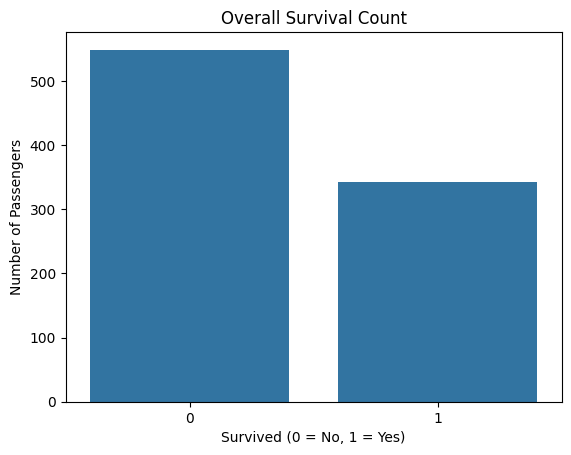

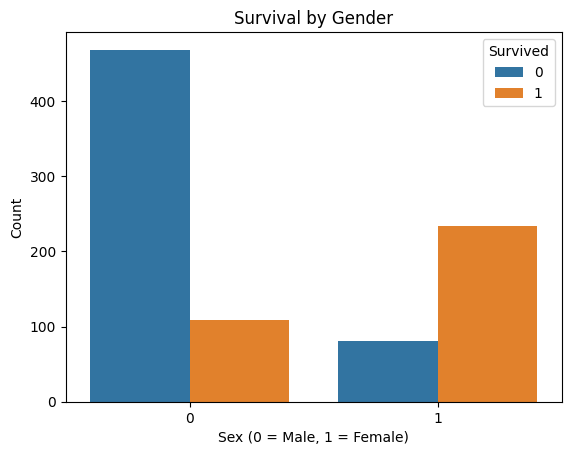

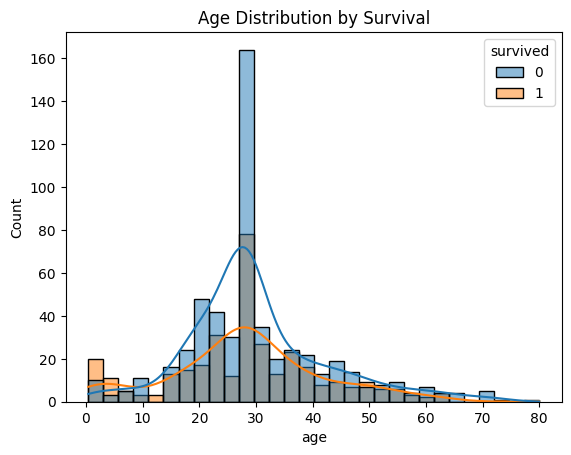

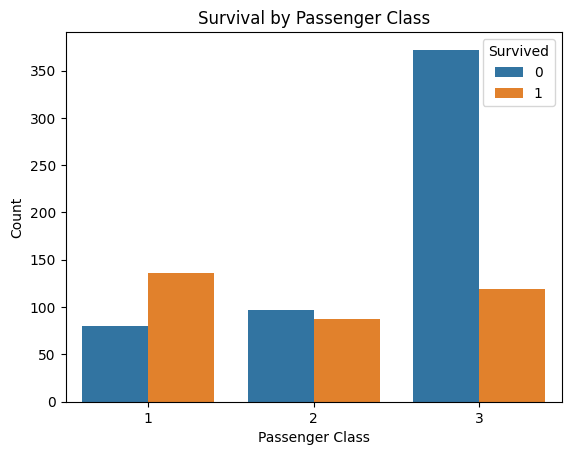

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival count
sns.countplot(x='survived', data=df)
plt.title('Overall Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

# Survival by Sex
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Age distribution
sns.histplot(data=df, x='age', hue='survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# Class vs Survival
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()
